# Coursework

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import pylab as plt
from matplotlib.ticker import FormatStrFormatter

## Solve the following systems of equations:

### Task 1 (10.9.7)
$\dot{y_1} = -0.04y_1 + 10^4y_2y_3$  
$\dot{y_2} = 0.04y_1 - 10^4y_2y_3 - 3\cdot10^7{y_2}^2$  
$\dot{y_3} = 3\cdot10^7{y_2}^2$ 

$y_1(0) = 1,$
$y_i(0) = 0,$
$i = \overline{1,2}$    

$T_k = 40, 10^{2}, 10^{3}, ..., 10^{11}$  

### Task 2 (10.9.8)

$\dot{y_1} = 77.27(y_2 + y_1(1 - 8.375\cdot10^{-6}y_1 - y_2))$   
$\dot{y_2} = 77.27^{-1}(y_3 - (1 + y_1)y_2)$  
$\dot{y_3} = 0.161(y_1 - y_3)$ 

$y_i(0) = 0.01,$
$i = \overline{1,3}$    

$T_k = 800$  

### Task 3 (10.9.9)
$\dot{y_1} = -Ay_1 - By_1y_3$  
$\dot{y_2} = Ay_1 - MCy_2y_3$   
$\dot{y_3} = Ay_1 - By_1y_3 - MCy_2y_3 + Cy_4$  
$\dot{y_4} = By_1y_3 - Cy_4$   

$A = 7.89\cdot10^{-10},$
$B = 1.1\cdot10^{7},$ 
$C = 1.13\cdot10^{3},$
$M = 10^{6}$

$y_1(0) = 1,76\cdot10^{-3},$
$y_i(0) = 0,$
$i = \overline{2,4}$ 

$T_k = 10^{3}, 10^{4}, ..., 10^{13}$

In [2]:
def equation_1(t, y):
    return [-4e-2 * y[0] + 1e4 * y[1] * y[2], 
           4e-2 * y[0] - 1e4 * y[1] * y[2] - 3e7 * (y[1] ** 2),
           3e7 * (y[1] ** 2)]

In [3]:
def equation_2(t, y): 
    return [77.27 * (y[1] + y[0] * (1 - 8.375 * 1e-6 * y[0] - y[1])), 
           (1 / 77.27) * (y[2] - (1 + y[0]) * y[1]),
           0.161 * (y[0] - y[2])]

In [4]:
def equation_3(t, y):
    A, B, C, M = 7.89e-10, 1.1e7, 1.13e3, 1e6
    return [-A * y[0] - B * y[1] * y[2], 
           A * y[0] - M * C * y[1] * y[2],
           A * y[0] - B * y[0] * y[2] - M * C * y[1] * y[2] + C * y[3],
           B * y[0] * y[2] - C * y[3]]

In [5]:
Ts_1 = [40] + [10 ** i for i in range(2, 12)]
Ts_2 = [800]
Ts_3 = [10 ** i for i in range(3, 14)]

In [6]:
def split(Ts, elements):
    return [np.linspace(0, T, elements) for T in Ts]    

In [7]:
ts_1 = split(Ts_1, int(1e4))
ts_2 = split(Ts_2, int(1e4))
ts_3 = split(Ts_3, int(1e4))

In [8]:
def solve(func, y0, ts, method):
    return [solve_ivp(func, [min(t), max(t)], y0, method=method, t_eval=t).y for t in ts]

In [9]:
ys_1 = solve(func=equation_1, y0=[1., 0. , 0.], ts=ts_1, method='Radau')

In [10]:
ys_2 = solve(func=equation_2, y0=[1e-3, 1e-3, 1e-3], ts=ts_2, method='Radau')

In [11]:
ys_3 = solve(func=equation_3, y0=[1.76e-3, 1e-4 , 1e-4, 1e-4], ts=ts_3, method='Radau')

In [12]:
def make_plot(x, y, task, index=None, scale='linear', ylim=None):
    if task in [1, 3]:
        plt.subplot(4, 3, index + 1)
    elif task == 2:
        plt.axes().set_ylim(ylim)
        
    plt.plot(x, y[0], 'g', label = 'y1 (t)')
    plt.plot(x, y[1], 'r', label = 'y2 (t)')
    plt.plot(x, y[2], 'b', label = 'y3 (t)')
    if task == 3:
        plt.plot(x, y[3], 'y', label = 'y4 (t)')
    
    if task == 1:
        plt.title('T = 40' if (Ts_1[i] == 40) else 'T = 10^' + str(i+1))
    elif task == 2:
        plt.title('T = 800')
    elif task == 3:
        plt.title('T = 10^' + str(i+3))    
        
    plt.yscale(scale)
    plt.legend(loc='best')
    plt.xlabel('t', horizontalalignment='right', x=0.85)
    plt.grid()

In [13]:
def make_plot_ys(x, y, task):
    plt.figure(figsize=(18, 12))

    if task in [1, 2]:
        plotter_for_ys(y[0], y[1], xlabel='y0', ylabel='y1', index=0)
        plotter_for_ys(y[0], y[2], xlabel='y0', ylabel='y2', index=1)
        plotter_for_ys(y[1], y[2], xlabel='y1', ylabel='y2', index=2)
        
    elif task == 3:
        plotter_for_ys(y[0], y[1], xlabel='y0', ylabel='y1', index=0)
        plotter_for_ys(y[0], y[2], xlabel='y0', ylabel='y2', index=1)
        plotter_for_ys(y[0], y[3], xlabel='y0', ylabel='y3', index=2)
        plotter_for_ys(y[1], y[2], xlabel='y1', ylabel='y2', index=3)
        plotter_for_ys(y[1], y[3], xlabel='y1', ylabel='y3', index=4)
        plotter_for_ys(y[2], y[3], xlabel='y2', ylabel='y3', index=5)

In [14]:
def plotter_for_ys(x, y, xlabel, ylabel, index):
    ax = plt.subplot(3, 3, index + 1)
    plt.plot(x, y, label = ylabel + ' (' + xlabel + ')')
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
    plt.xticks(np.arange(min(x), max(x), (max(x) - min(x)) / 5))
    plt.legend(loc='best')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()

## Dependence of $y_i$ on $t$

### Task 1 - linear scale

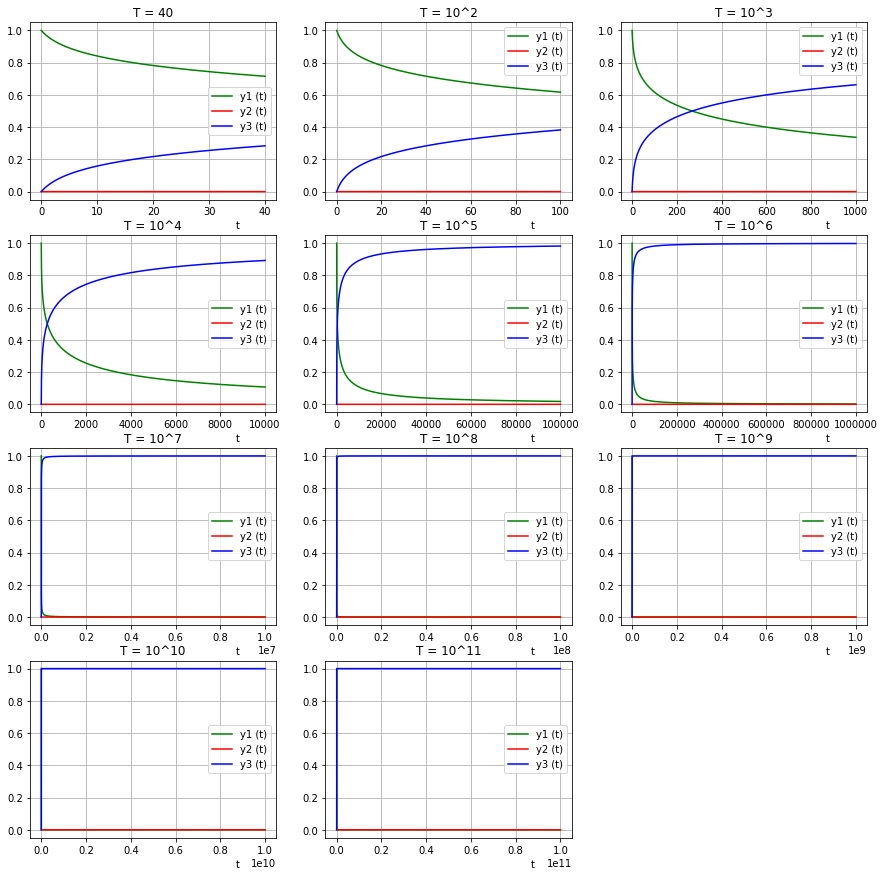

In [15]:
plt.figure(figsize=(15, 15))
for i in range(len(Ts_1)):
    make_plot(x=ts_1[i], y=ys_1[i], task=1, index=i)

### Task 1 - log scale

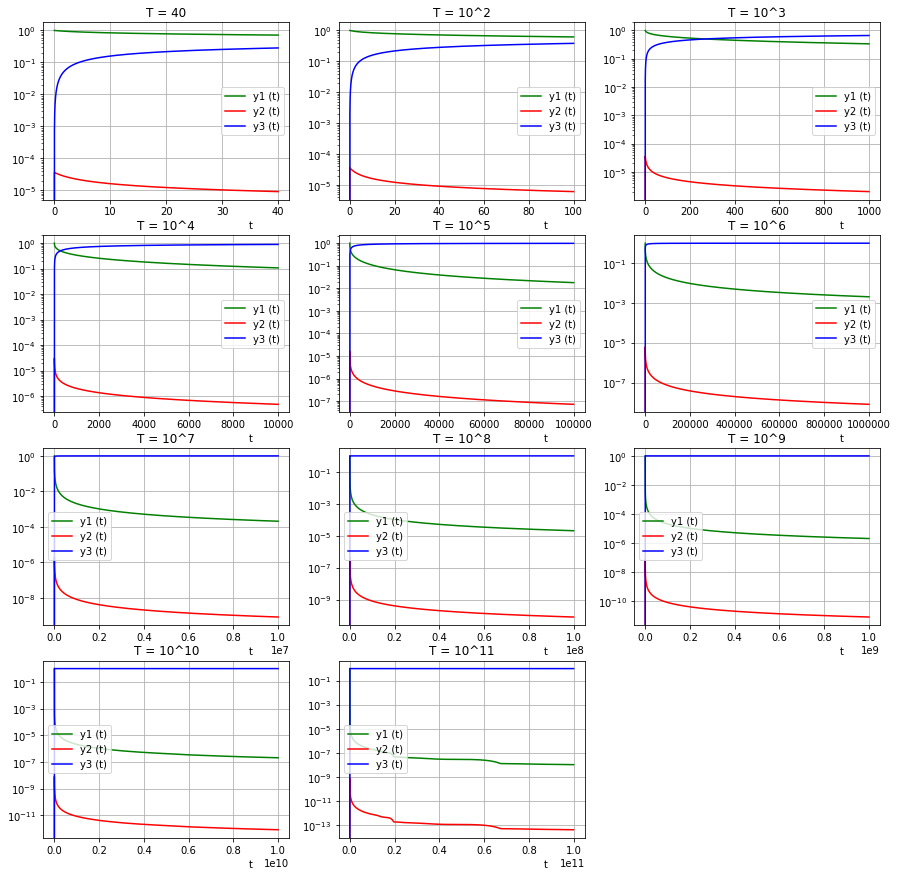

In [16]:
plt.figure(figsize=(15, 15))
for i in range(len(Ts_1)):
    make_plot(x=ts_1[i], y=ys_1[i], task=1, index=i, scale='log')

### Task 2

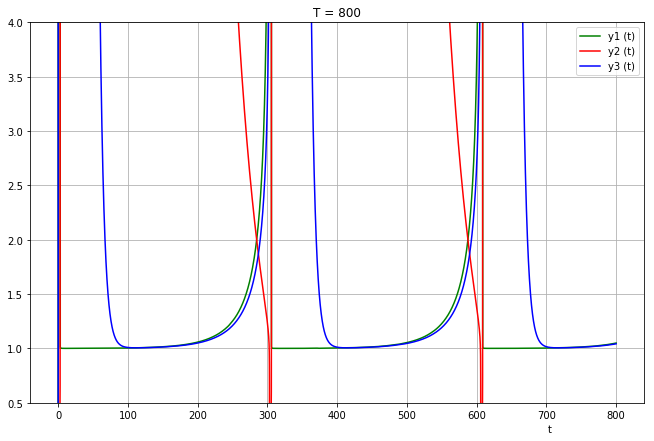

In [17]:
plt.figure(figsize=(11, 7))
make_plot(x=ts_2[0], y=ys_2[0], task=2, ylim = [0.5, 4])

### Task 3 - linear scale

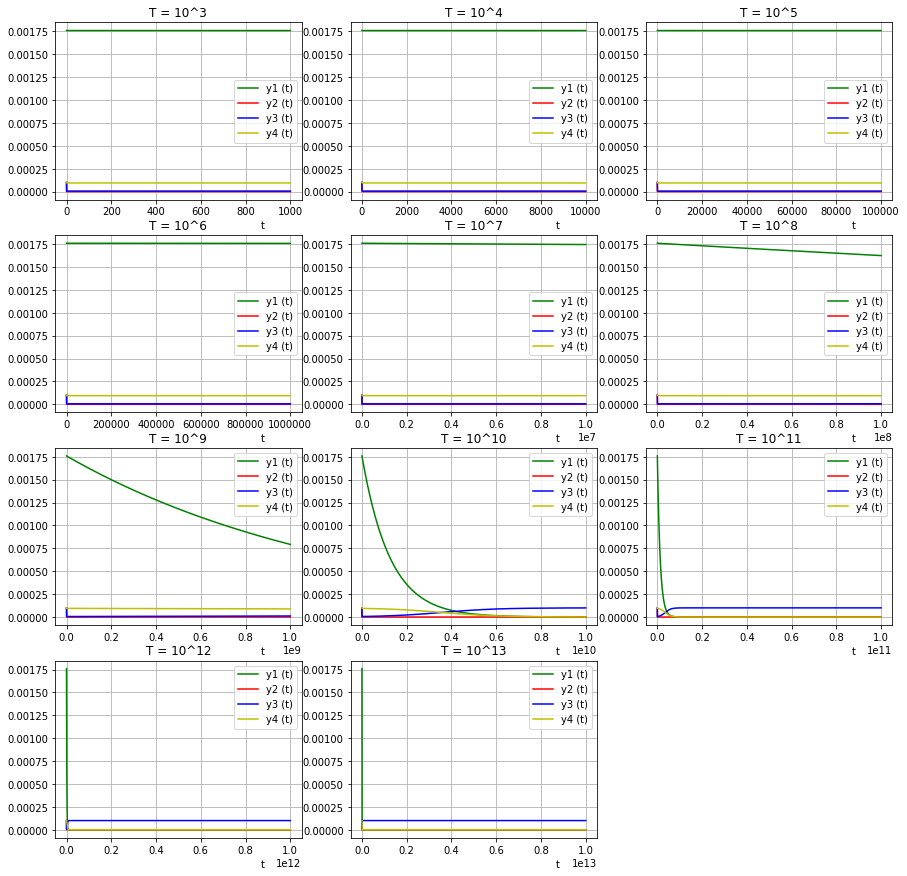

In [18]:
plt.figure(figsize=(15, 15))
for i in range(len(Ts_3)):
    make_plot(x=ts_3[i], y=ys_3[i], index=i, task=3)

### Task 3 - log scale

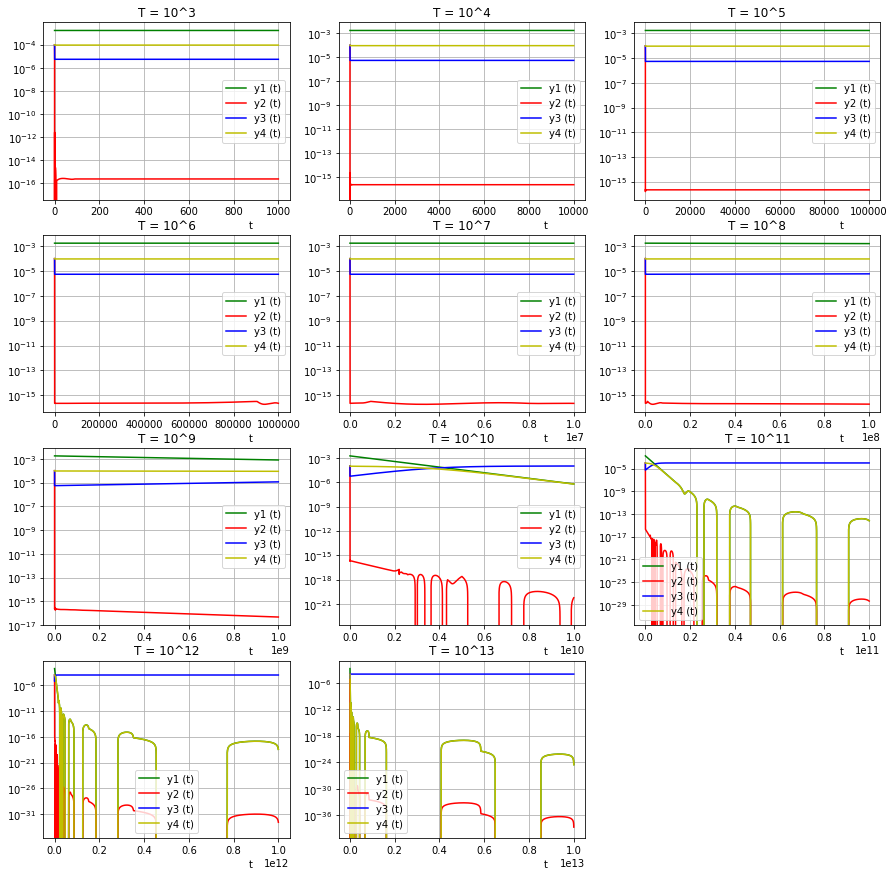

In [19]:
plt.figure(figsize=(15, 15))
for i in range(len(Ts_3)):
    make_plot(x=ts_3[i], y=ys_3[i], task=3, index=i, scale='log')

## Dependence of $y_i$ on $y_j$ ($y_i \neq y_j$)

### Task 1

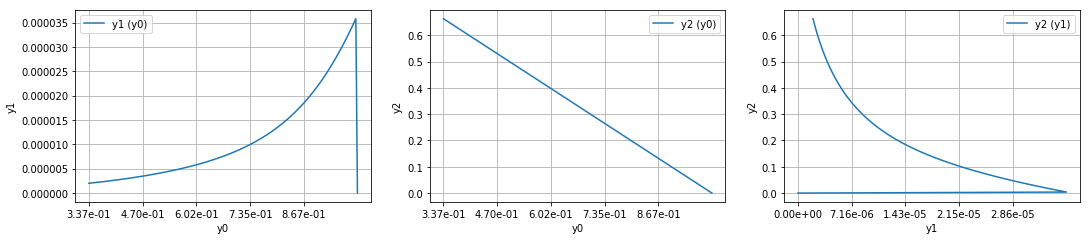

In [20]:
make_plot_ys(x=ts_1[2], y=ys_1[2], task=1)

### Task 2

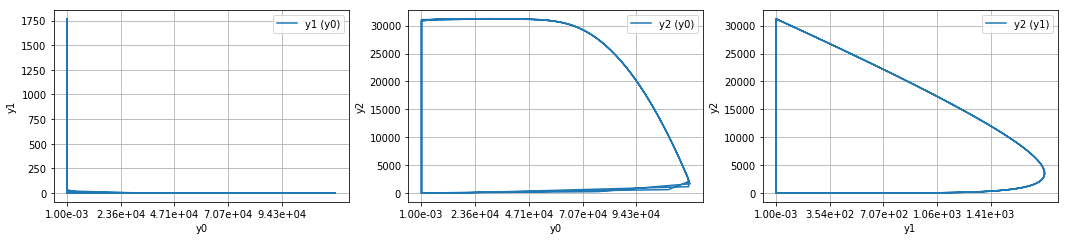

In [21]:
make_plot_ys(x=ts_2[0], y=ys_2[0], task=2)

### Task 3

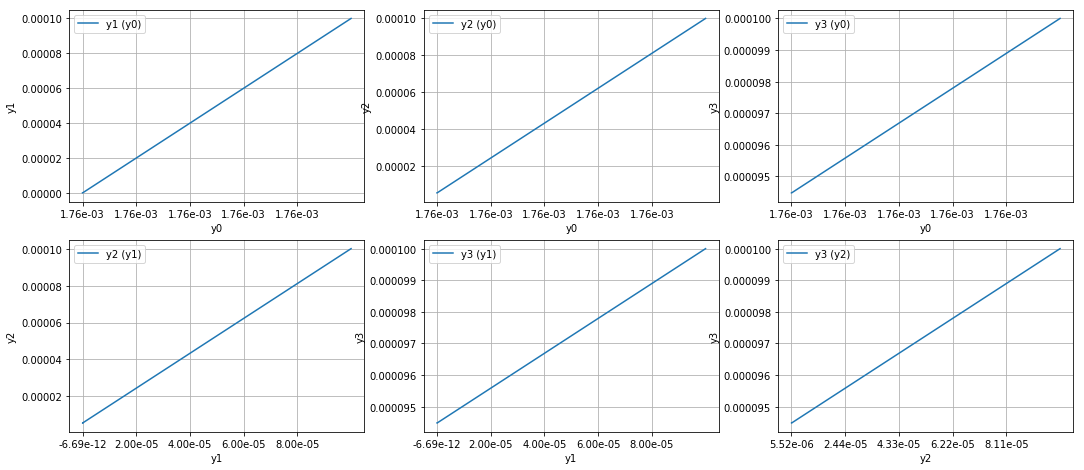

In [22]:
make_plot_ys(x=ts_3[0], y=ys_3[0], task=3)